In [160]:





import datetime
import pytz
import pandas as pd
import MetaTrader5 as mt5
import matplotlib.pyplot as plt
import numpy as np
import pandas_ta as ta







In [161]:





# 30 min time frame
frameM30 = mt5.TIMEFRAME_M30

#1 min time frame
frameM1 = mt5.TIMEFRAME_M1

# 1 hour time frame
frameH1 = mt5.TIMEFRAME_H1





In [162]:





def getAssetList(assetSet = None):
    assetList = []
    if assetSet == 1:
        assetList = ['EURUSD', 'USDCHF']
    return assetList

        





In [163]:







## Defining the getQuotes method

def getQuotes(mt5TimeFrame, year = 2020, month = 1, day = 1, asset ='EURUSD'):
    
    ## Establishing the connection to MetaTrader 5
    if not mt5.initialize():
        print(f'MT5 initialization failed: Error code = {mt5.last_error}')
        quit()

    # Current time
    currentTime = datetime.datetime.now()

    # Defining the timezone and created utcFrom and utcTo dates
    timeZone = pytz.timezone('Asia/Kolkata')
    utcFrom = datetime.datetime(year, month, day, tzinfo = timeZone)
    utcTo = datetime.datetime(currentTime.year, currentTime.month, currentTime.day, tzinfo = timeZone)
    
    # Retrieving the data and returning it after converting it to pd dataframe
    return pd.DataFrame(mt5.copy_rates_range(asset, mt5TimeFrame, utcFrom, utcTo))







In [164]:



df = getQuotes(frameM30, 2023, 8, 3)
df





,time,open,high,low,close,tick_volume,spread,real_volume
0,1691001000,1.09365,1.09438,1.09335,1.09379,2948,8,0
1,1691002800,1.09379,1.09460,1.09366,1.09453,2460,8,0
2,1691004600,1.09454,1.09525,1.09420,1.09502,2402,8,0
3,1691006400,1.09502,1.09573,1.09500,1.09533,1812,8,0
4,1691008200,1.09533,1.09534,1.09457,1.09457,1302,8,0
...,...,...,...,...,...,...,...,...
331,1691769600,1.09679,1.09808,1.09602,1.09643,5642,8,0
332,1691771400,1.09643,1.09717,1.09546,1.09617,5858,8,0
333,1691773200,1.09618,1.09807,1.09573,1.09761,10063,8,0
334,1691775000,1.09761,1.09834,1.09654,1.09718,6596,8,0


In [165]:




def awesome(df, shortSmaPeriod, longSmaPeriod):
    df['mid'] = (df['high'] + df['low']) / 2
    df[f'sma-{shortSmaPeriod}'] = ta.sma(df['mid'], length=shortSmaPeriod)
    df[f'sma-{longSmaPeriod}'] = ta.sma(df['mid'], length=longSmaPeriod)
    df['awesome'] = df[f'sma-{longSmaPeriod}'] - df[f'sma-{shortSmaPeriod}']
    return df





In [166]:

shortSmaPeriod = 5
longSmaPeriod = 34

df = awesome(df, shortSmaPeriod, longSmaPeriod)

df


,time,open,high,low,close,tick_volume,spread,real_volume,mid,sma-5,sma-34,awesome
0,1691001000,1.09365,1.09438,1.09335,1.09379,2948,8,0,1.093865,NaN,NaN,NaN
1,1691002800,1.09379,1.09460,1.09366,1.09453,2460,8,0,1.094130,NaN,NaN,NaN
2,1691004600,1.09454,1.09525,1.09420,1.09502,2402,8,0,1.094725,NaN,NaN,NaN
3,1691006400,1.09502,1.09573,1.09500,1.09533,1812,8,0,1.095365,NaN,NaN,NaN
4,1691008200,1.09533,1.09534,1.09457,1.09457,1302,8,0,1.094955,1.094608,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
331,1691769600,1.09679,1.09808,1.09602,1.09643,5642,8,0,1.097050,1.098863,1.098783,-0.000080
332,1691771400,1.09643,1.09717,1.09546,1.09617,5858,8,0,1.096315,1.098280,1.098737,0.000457
333,1691773200,1.09618,1.09807,1.09573,1.09761,10063,8,0,1.096900,1.097722,1.098707,0.000985
334,1691775000,1.09761,1.09834,1.09654,1.09718,6596,8,0,1.097440,1.097213,1.098691,0.001478


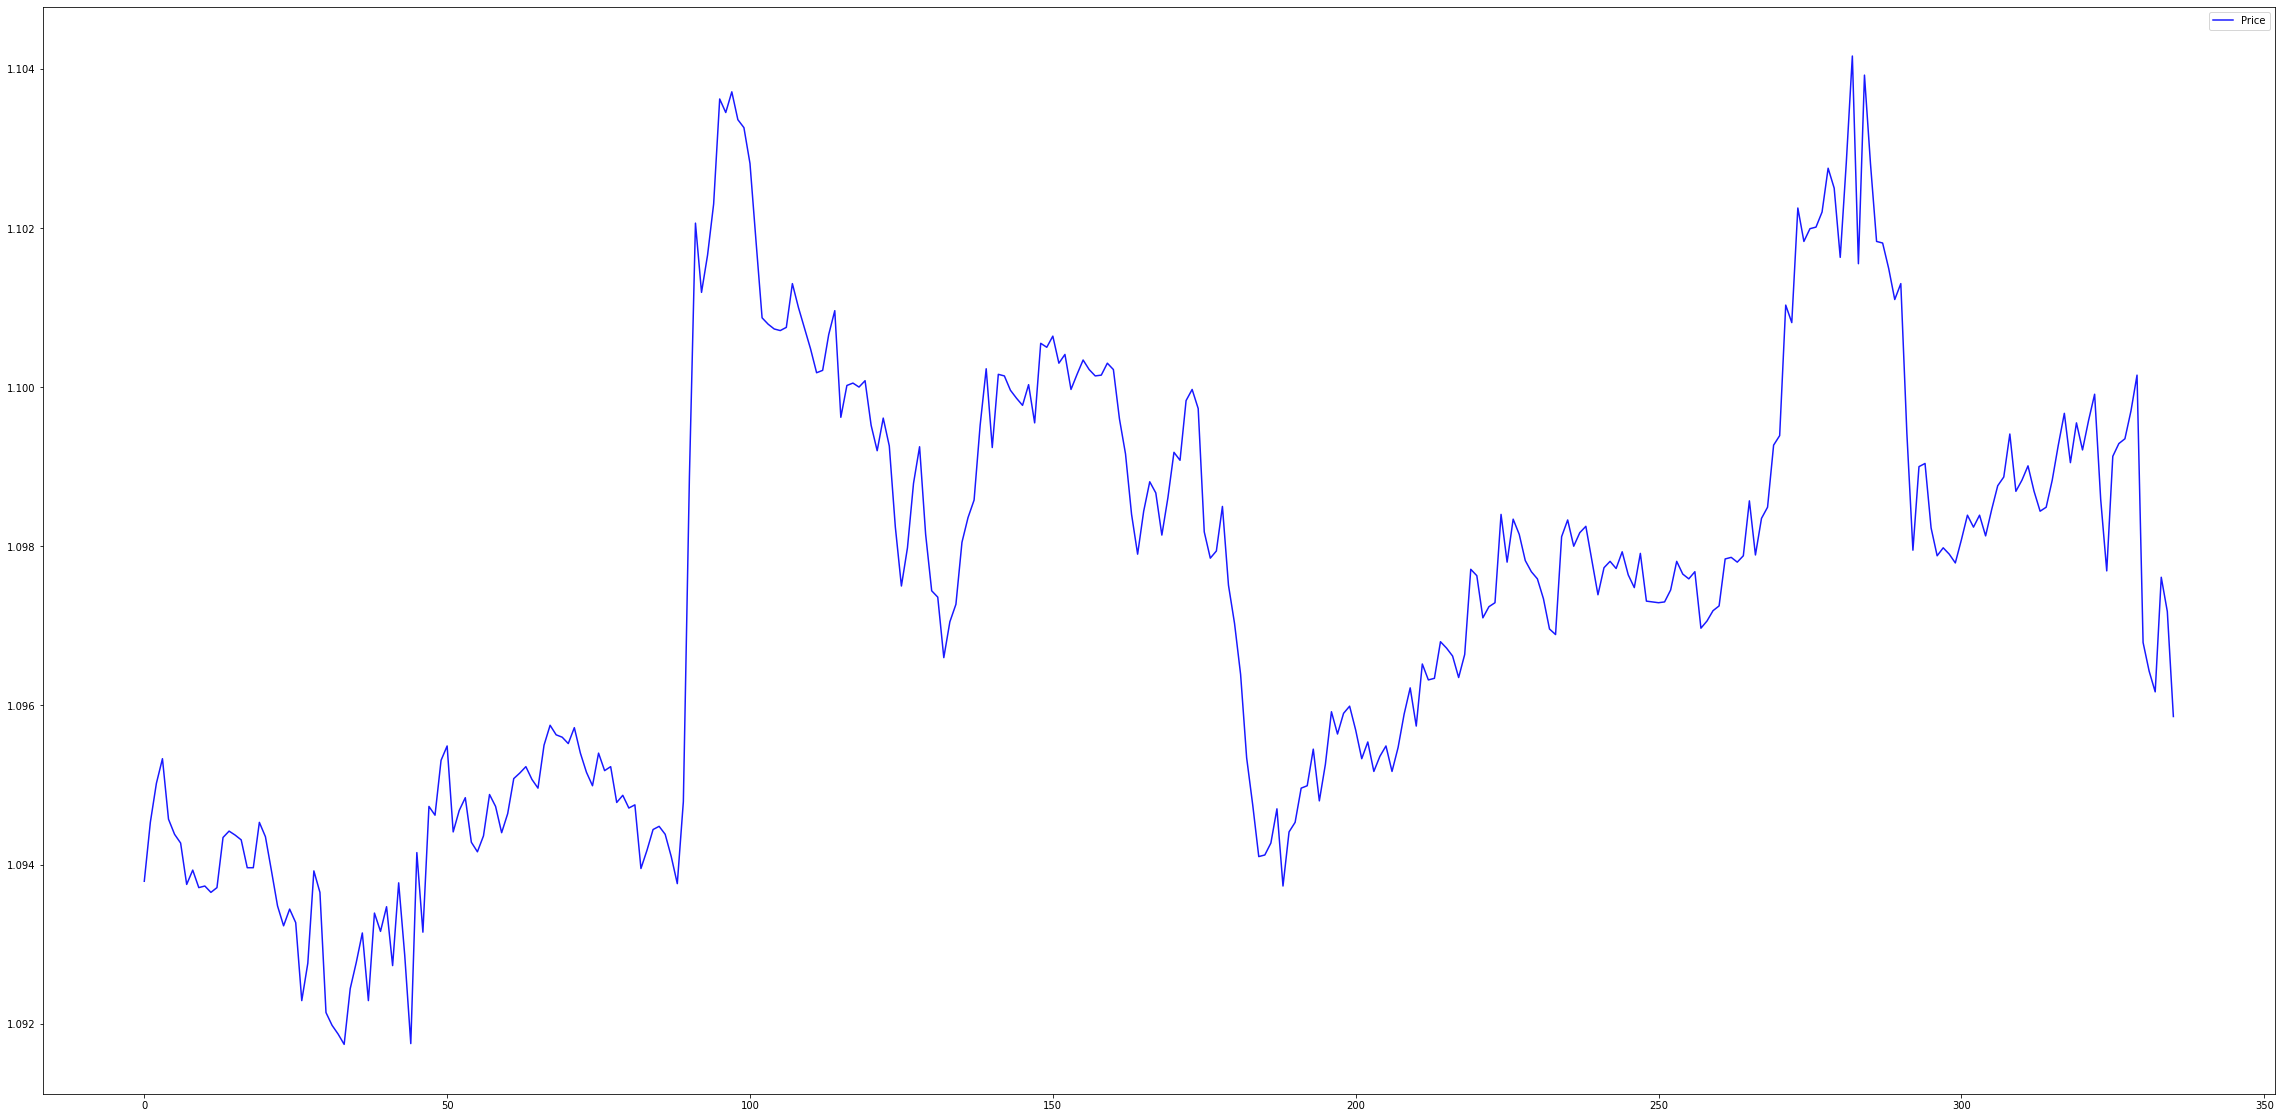

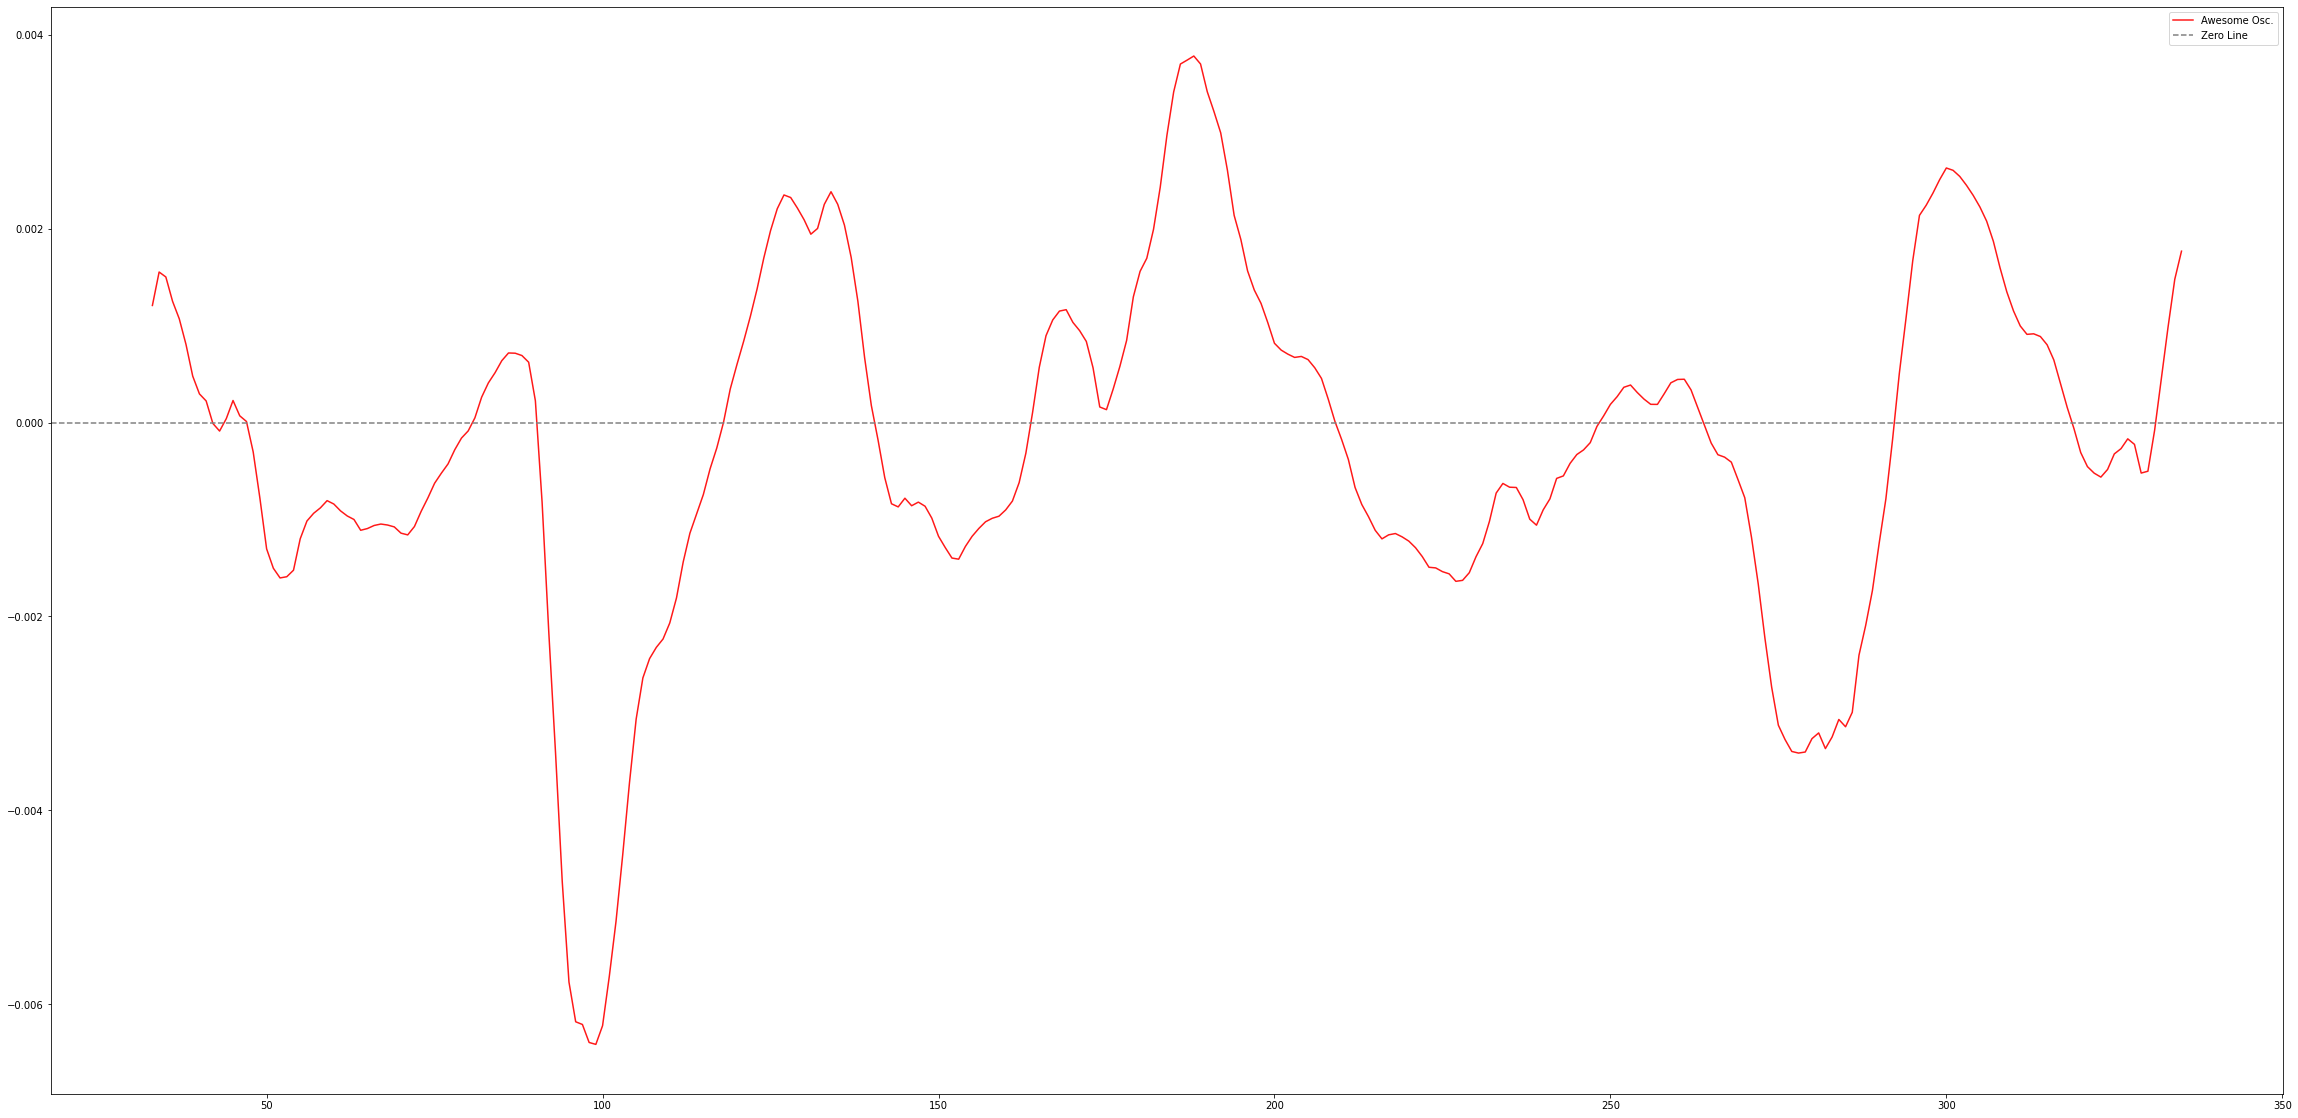

In [167]:


## Increasing the figure size
plt.figure(figsize = (40, 20))

## Plotting the Asset Price.
plt.plot(df['close'], label='Price', c='blue', alpha=0.9)

# Showing the plot
plt.legend()
plt.show()



## Increasing the figure size
plt.figure(figsize = (40, 20))

## Plotting the Macd Line & Signal Line
plt.plot(df['awesome'], label='Awesome Osc.', c='red',linewidth = 1.5, alpha=0.9)
plt.axhline(y=0, color='grey', linestyle='--', label='Zero Line')


# Showing the plot
plt.legend()
plt.show()





## Strategy - 1

- Buy If the slope of the candles are positive & before it was negative. (Example , Take n = 3 Or 4 )
- Sell If the slope of the candles are negative & before it was positive. (Example, Take n = 3 Or 4)


In [168]:

# Number of candles , for which I will check the average slope.
smalln = 6
# longn = 6

# Calculate slope of each candle wrt. previous candle.
df['slope'] = df['awesome'].diff()

df[f'avg-slope-{smalln}'] = df['slope'].rolling(window=smalln).mean()
# df[f'avg-slope-{longn}'] = df['slope'].rolling(window=longn).mean()

df





,time,open,high,low,close,tick_volume,spread,real_volume,mid,sma-5,sma-34,awesome,slope,avg-slope-6
0,1691001000,1.09365,1.09438,1.09335,1.09379,2948,8,0,1.093865,NaN,NaN,NaN,NaN,NaN
1,1691002800,1.09379,1.09460,1.09366,1.09453,2460,8,0,1.094130,NaN,NaN,NaN,NaN,NaN
2,1691004600,1.09454,1.09525,1.09420,1.09502,2402,8,0,1.094725,NaN,NaN,NaN,NaN,NaN
3,1691006400,1.09502,1.09573,1.09500,1.09533,1812,8,0,1.095365,NaN,NaN,NaN,NaN,NaN
4,1691008200,1.09533,1.09534,1.09457,1.09457,1302,8,0,1.094955,1.094608,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,1691769600,1.09679,1.09808,1.09602,1.09643,5642,8,0,1.097050,1.098863,1.098783,-0.000080,0.000422,0.000041
332,1691771400,1.09643,1.09717,1.09546,1.09617,5858,8,0,1.096315,1.098280,1.098737,0.000457,0.000537,0.000121
333,1691773200,1.09618,1.09807,1.09573,1.09761,10063,8,0,1.096900,1.097722,1.098707,0.000985,0.000528,0.000192
334,1691775000,1.09761,1.09834,1.09654,1.09718,6596,8,0,1.097440,1.097213,1.098691,0.001478,0.000493,0.000284


In [169]:




buys = []
sells = []
buyIndices = []
sellIndices = []
openPosition = None


for i in range(len(df)):
    if (i > 0) and (openPosition is None) and (df.iloc[i][f'avg-slope-{smalln}'] > 0) and (df.iloc[i - 1][f'avg-slope-{smalln}'] < 0):
        openPosition = 'long'
        buyIndices.append(i)
        buys.append(df.iloc[i]['close'])
    elif (i > 0) and (openPosition) and (df.iloc[i][f'avg-slope-{smalln}'] < 0) and (df.iloc[i - 1][f'avg-slope-{smalln}'] > 0):
        openPosition = None
        sellIndices.append(i)
        sells.append(df.iloc[i]['close'])








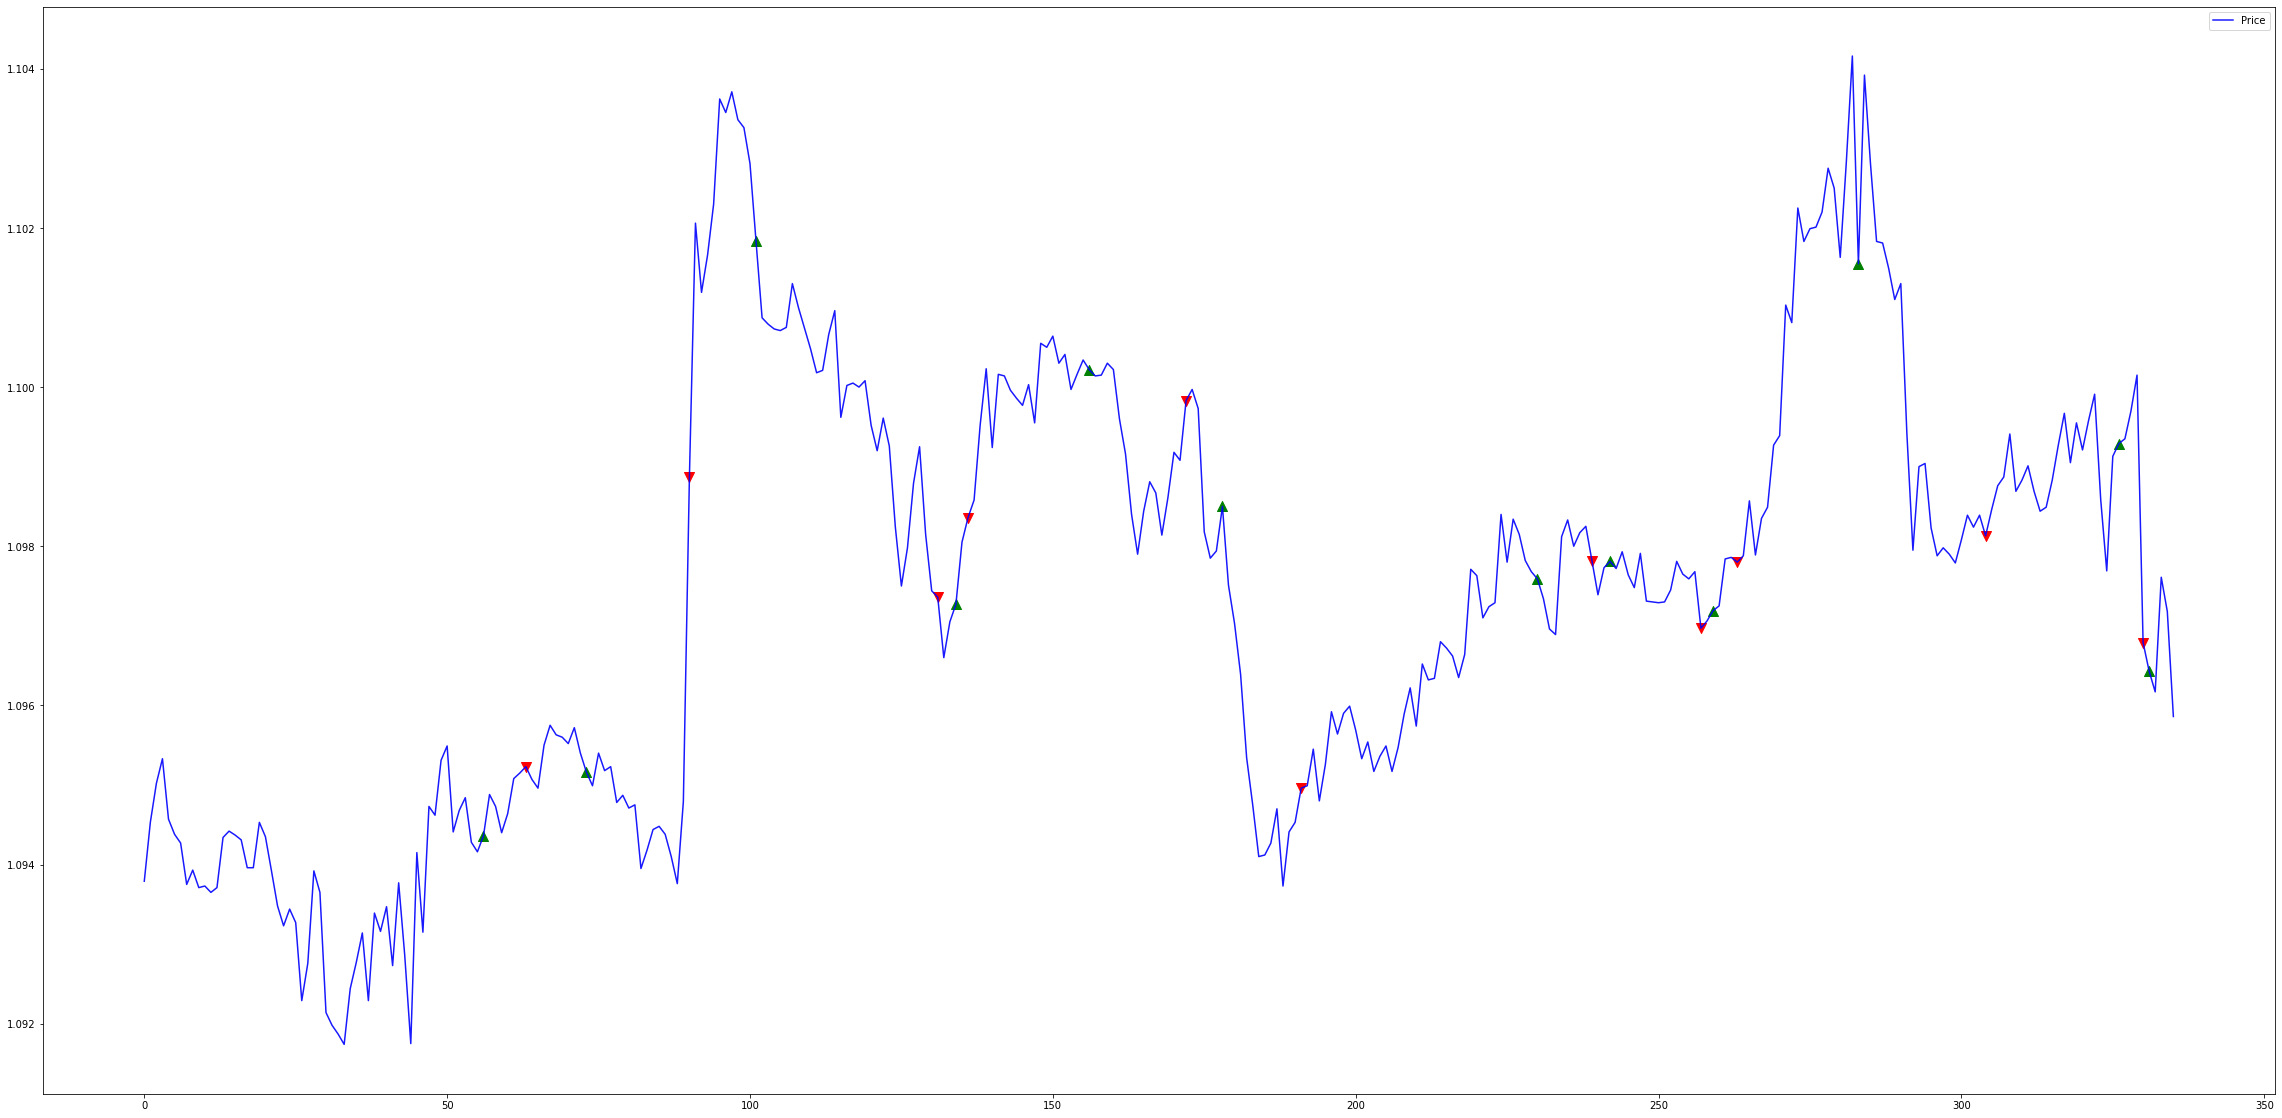

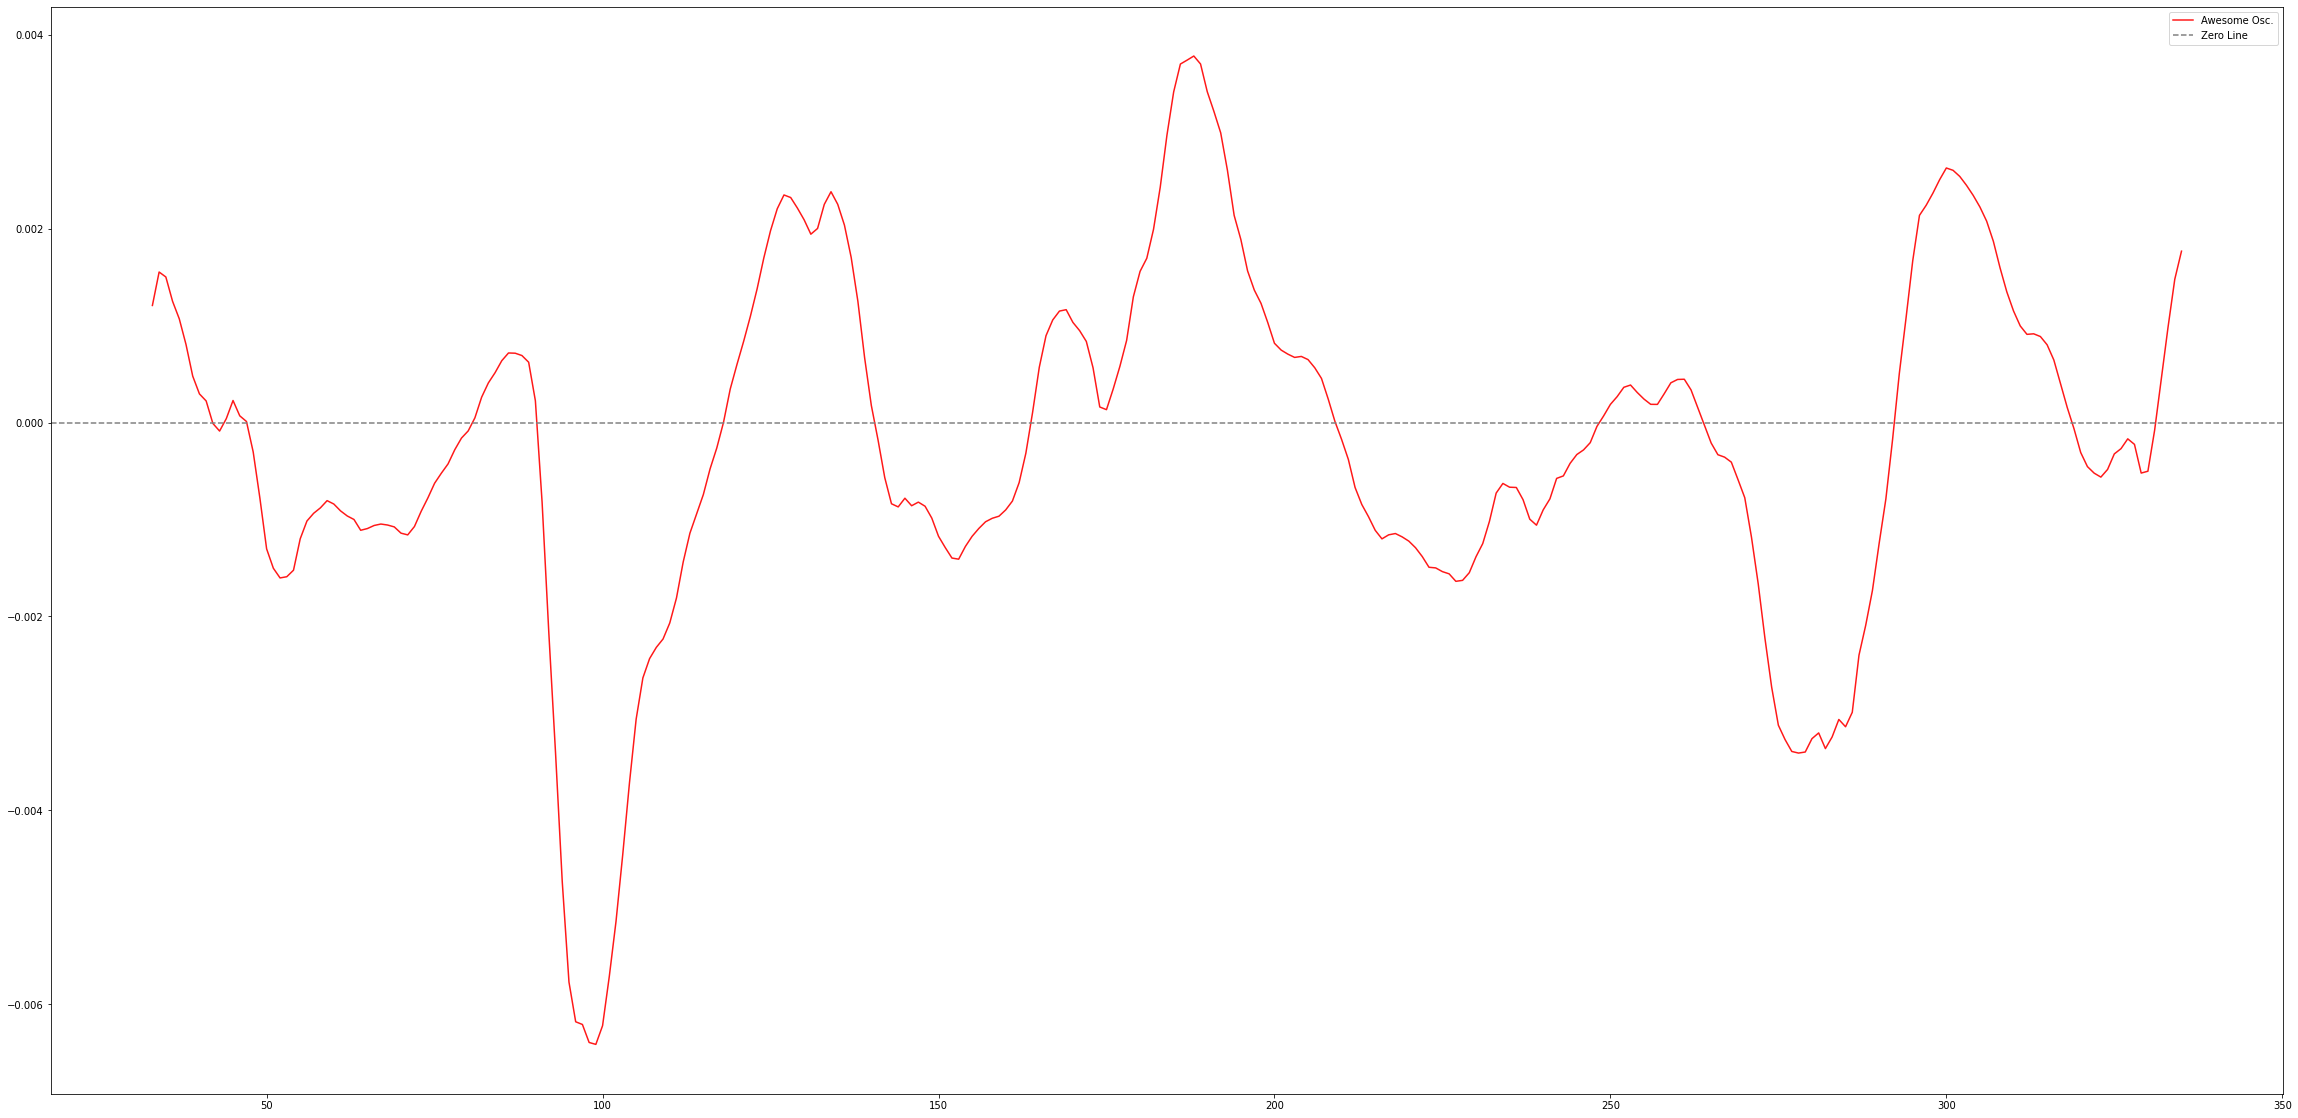

In [170]:


## Increasing the figure size
plt.figure(figsize = (40, 20))

## Plotting the Asset Price.
plt.plot(df['close'], label='Price', c='blue', alpha=0.9)
plt.scatter(df.iloc[buyIndices].index, df.iloc[buyIndices]['close'], marker = '^', color = 'g', s = 100)
plt.scatter(df.iloc[sellIndices].index, df.iloc[sellIndices]['close'], marker = 'v', color = 'r', s = 100)

# Showing the plot
plt.legend()
plt.show()



## Increasing the figure size
plt.figure(figsize = (40, 20))

## Plotting the Macd Line & Signal Line
plt.plot(df['awesome'], label='Awesome Osc.', c='red',linewidth = 1.5, alpha=0.9)
plt.axhline(y=0, color='grey', linestyle='--', label='Zero Line')


# Showing the plot
plt.legend()
plt.show()


In [171]:


# P & L and other details

totalPL = 0
winTrades = 0
loseTrades = 0
maximumWin = None
maximumLose = None

for i in range(len(sells)):
    netResult = sells[i] - buys[i]

    if netResult < 0:
        loseTrades += 1
    else:
        winTrades += 1

    if not maximumWin:
        maximumWin = netResult
    elif netResult > maximumWin:
        maximumWin = netResult

    if not maximumLose:
        maximumLose = netResult
    elif netResult < maximumLose:
        maximumLose = netResult

    totalPL = totalPL + netResult
    # print(f'Net Trade Result = {netResult}')

print(f'Total P & L = {totalPL}')
print(f'Win Trades = {winTrades}')
print(f'Lose Trades = {loseTrades}')
print(f'Maximum Win = {maximumWin}')
print(f'Maximum Lose = {maximumLose}')




Total P & L = -0.008650000000000047
Win Trades = 5
Lose Trades = 6
Maximum Win = 0.003710000000000102
Maximum Lose = -0.004469999999999974


## Strategy-2

- Buy, If Awesome Oscillator comes above 0 line.
- Sell, If Awesome Oscillator crosses to below 0 line.


In [172]:





buys = []
sells = []
buyIndices = []
sellIndices = []
openPosition = None


for i in range(len(df)):
    if (i > 0) and (openPosition is None) and (df.iloc[i]['awesome'] > 0) and (df.iloc[i - 1]['awesome'] < 0):
        openPosition = 'long'
        buyIndices.append(i)
        buys.append(df.iloc[i]['close'])
    elif (i > 0) and (openPosition) and (df.iloc[i]['awesome'] < 0) and (df.iloc[i - 1]['awesome'] > 0):
        openPosition = None
        sellIndices.append(i)
        sells.append(df.iloc[i]['close'])










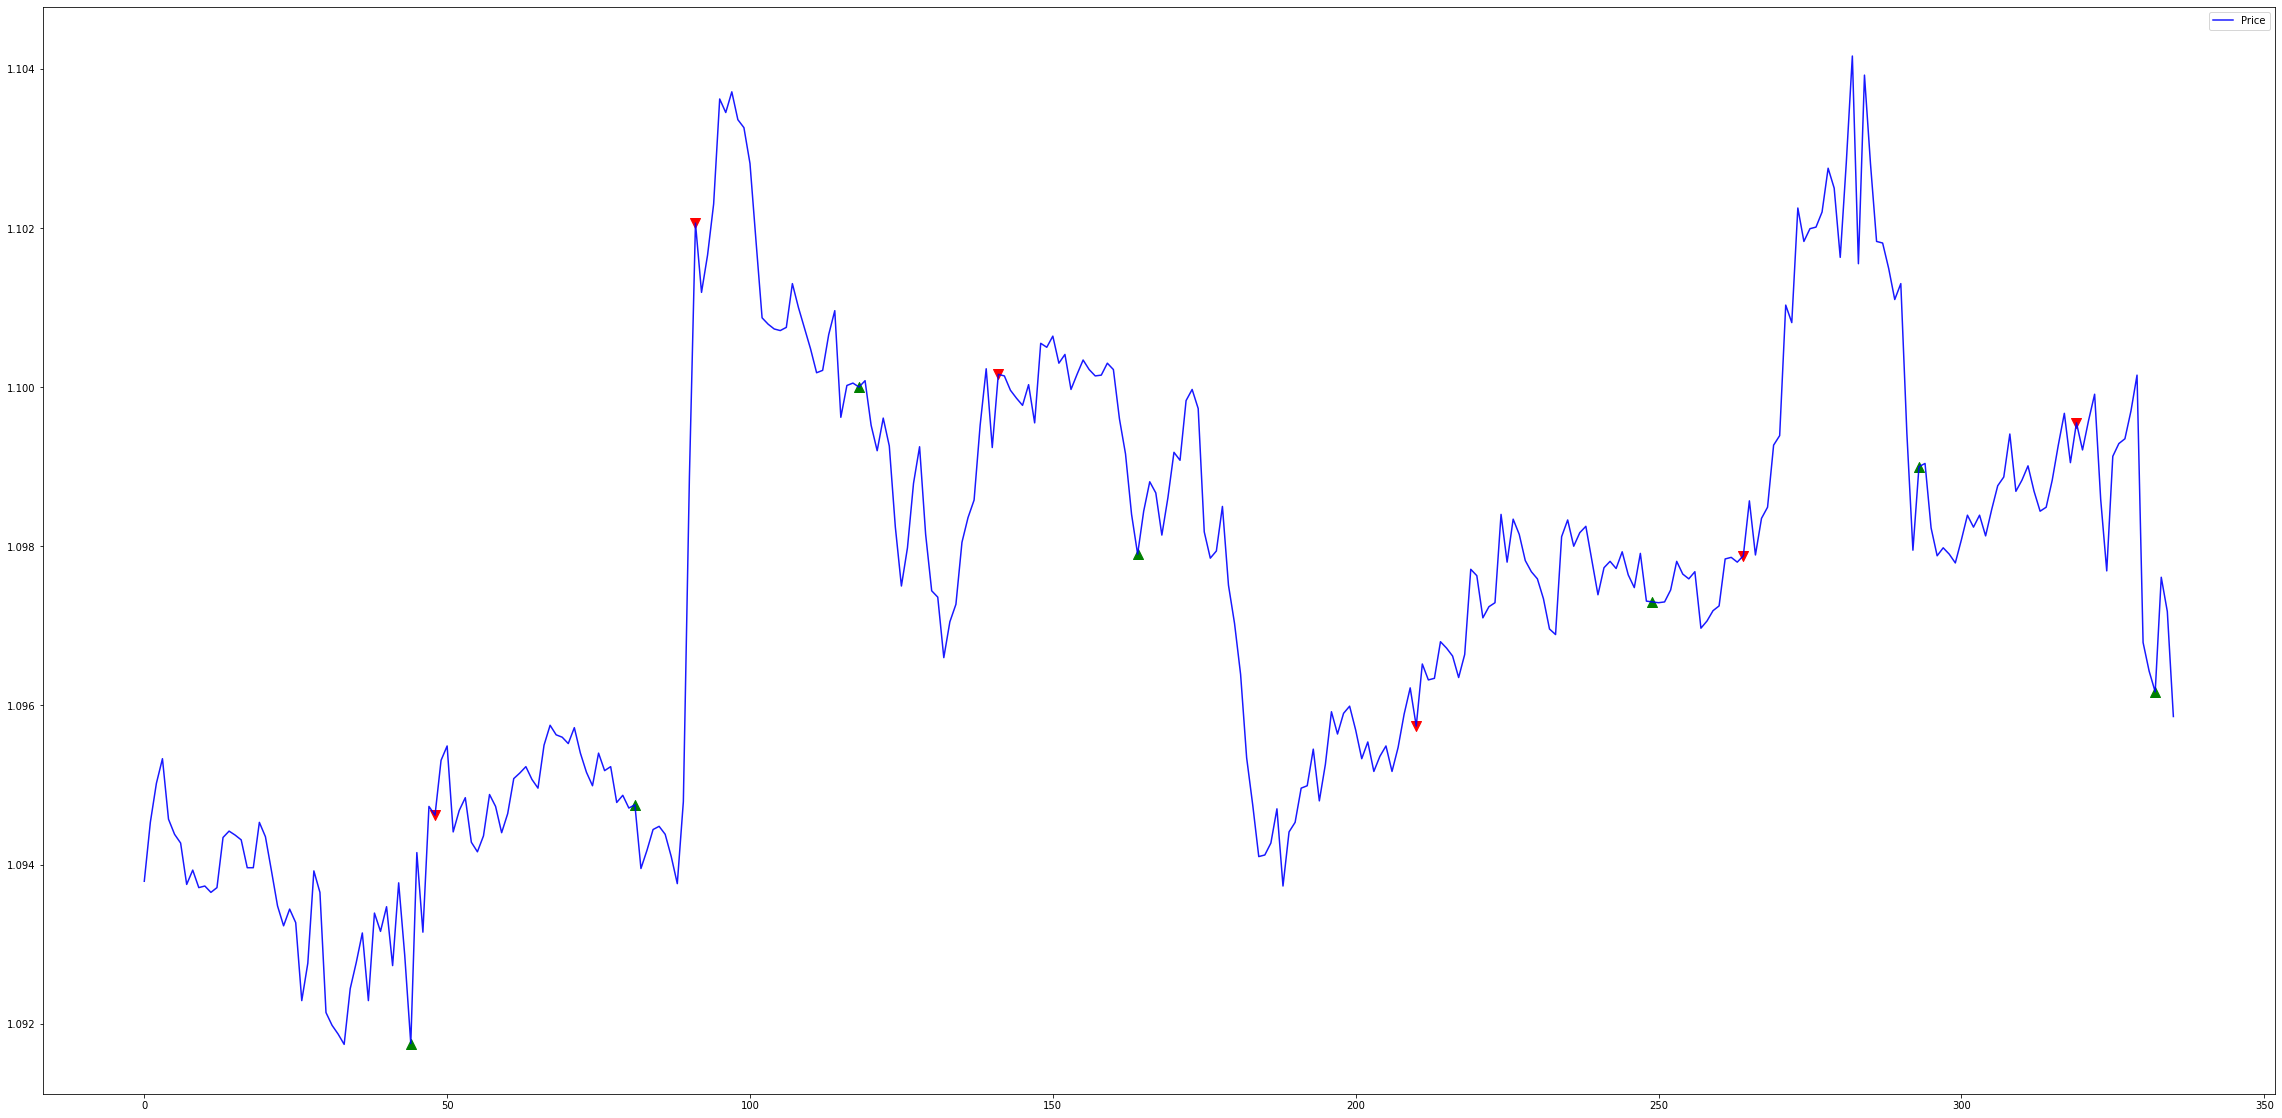

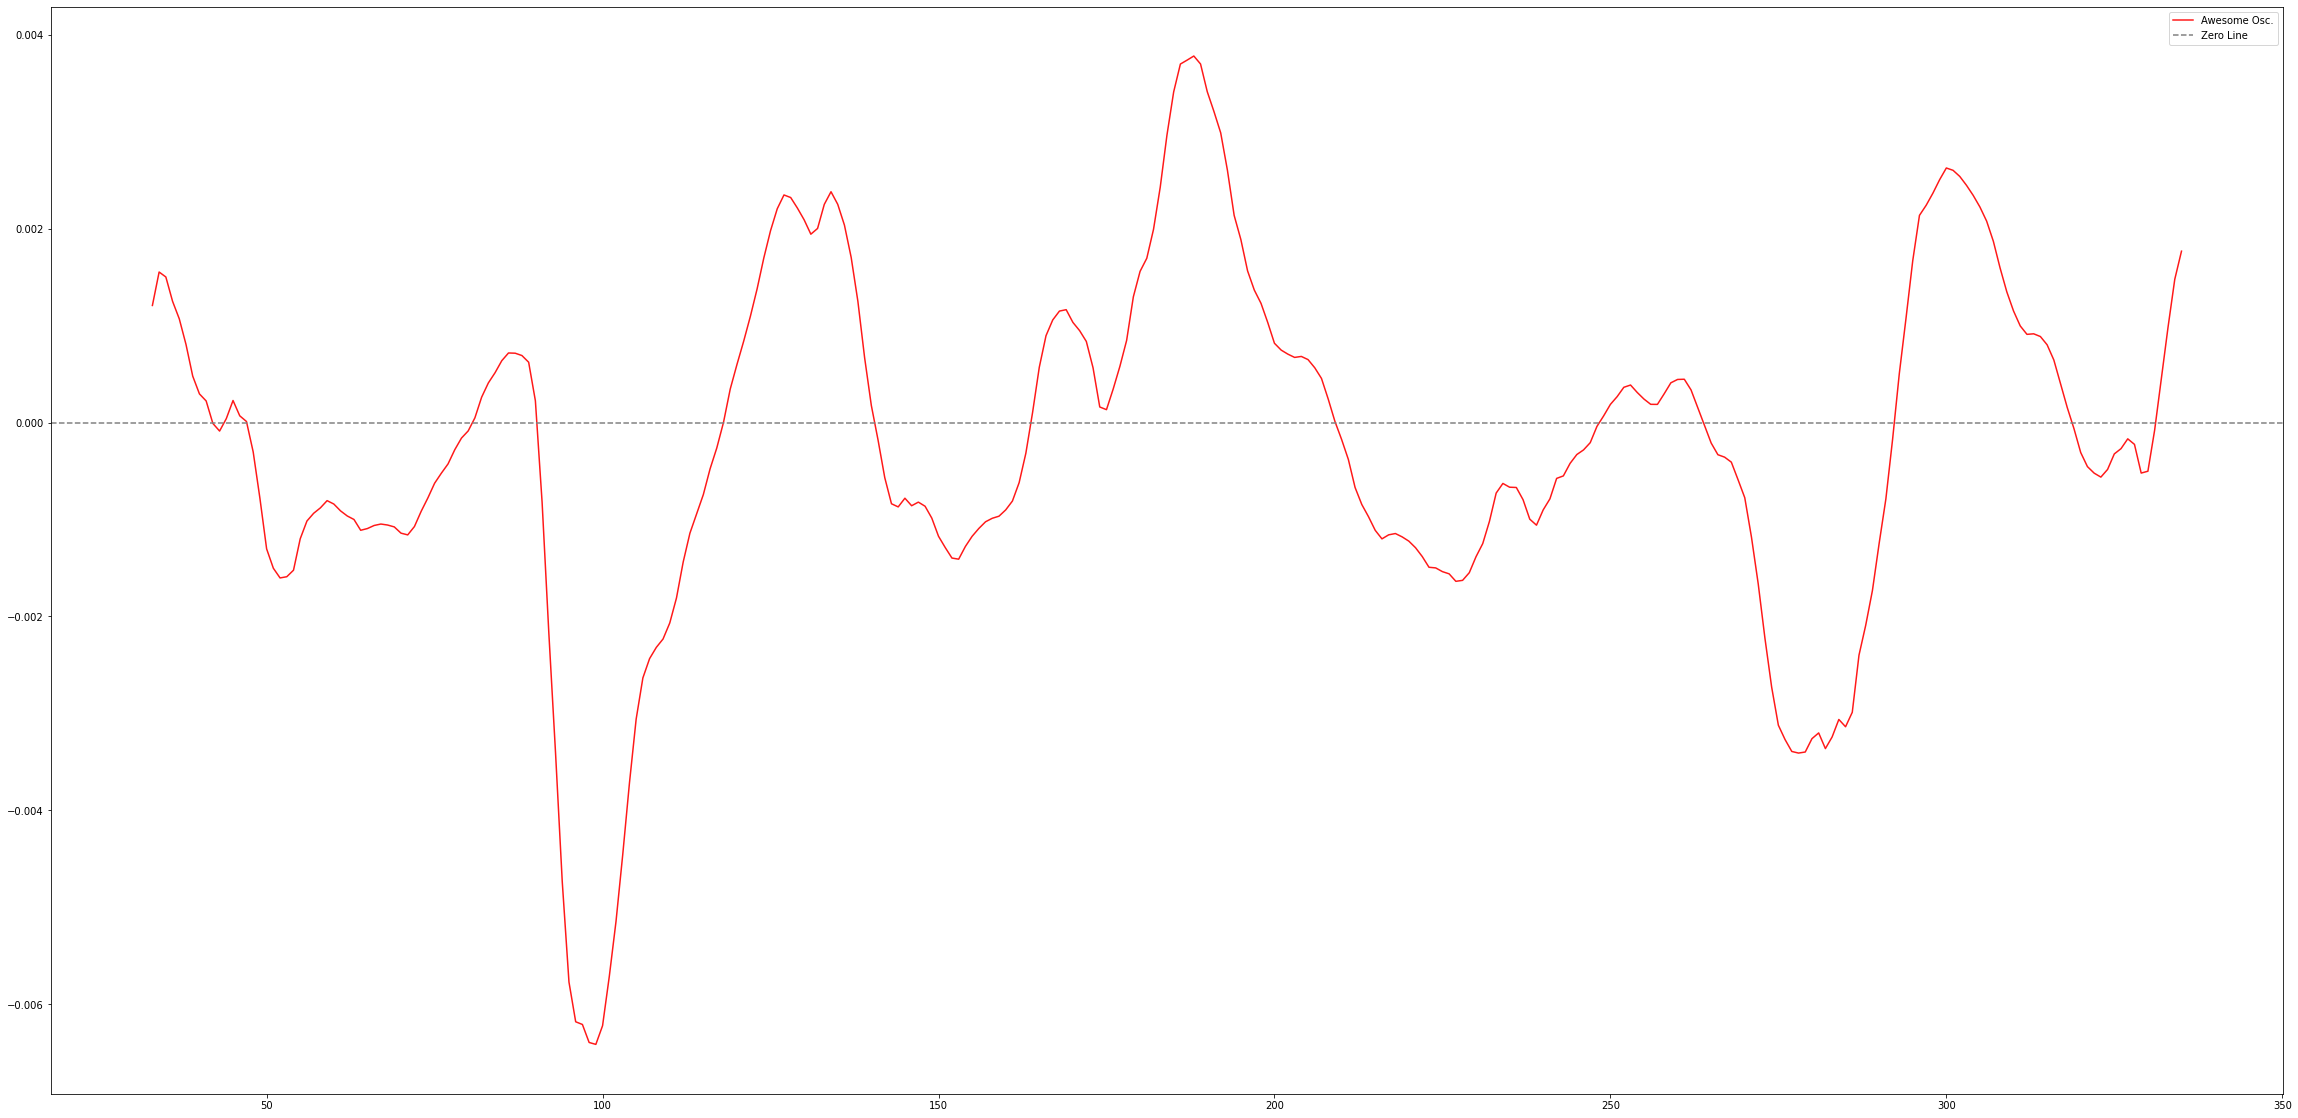

In [173]:








## Increasing the figure size
plt.figure(figsize = (40, 20))

## Plotting the Asset Price.
plt.plot(df['close'], label='Price', c='blue', alpha=0.9)
plt.scatter(df.iloc[buyIndices].index, df.iloc[buyIndices]['close'], marker = '^', color = 'g', s = 100)
plt.scatter(df.iloc[sellIndices].index, df.iloc[sellIndices]['close'], marker = 'v', color = 'r', s = 100)

# Showing the plot
plt.legend()
plt.show()



## Increasing the figure size
plt.figure(figsize = (40, 20))

## Plotting the Macd Line & Signal Line
plt.plot(df['awesome'], label='Awesome Osc.', c='red',linewidth = 1.5, alpha=0.9)
plt.axhline(y=0, color='grey', linestyle='--', label='Zero Line')


# Showing the plot
plt.legend()
plt.show()






In [174]:





# P & L and other details

totalPL = 0
winTrades = 0
loseTrades = 0
maximumWin = None
maximumLose = None

for i in range(len(sells)):
    netResult = sells[i] - buys[i]

    if netResult < 0:
        loseTrades += 1
    else:
        winTrades += 1

    if not maximumWin:
        maximumWin = netResult
    elif netResult > maximumWin:
        maximumWin = netResult

    if not maximumLose:
        maximumLose = netResult
    elif netResult < maximumLose:
        maximumLose = netResult

    totalPL = totalPL + netResult
    # print(f'Net Trade Result = {netResult}')

print(f'Total P & L = {totalPL}')
print(f'Win Trades = {winTrades}')
print(f'Lose Trades = {loseTrades}')
print(f'Maximum Win = {maximumWin}')
print(f'Maximum Lose = {maximumLose}')







Total P & L = 0.00930999999999993
Win Trades = 5
Lose Trades = 1
Maximum Win = 0.00731000000000015
Maximum Lose = -0.002160000000000162
